In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("bank.csv")
df.head()
df.shape

(11162, 17)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
df.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



DecisionTreeClassifier()

In [ ]:
dt.feature_importances_

array([0.08237996, 0.03768402, 0.01733365, 0.01229947, 0.00084141,
       0.08334602, 0.04219755, 0.00616465, 0.06271981, 0.07466128,
       0.09520858, 0.35254058, 0.02190591, 0.04806304, 0.01817101,
       0.04448306])

## hyperparameter tunning

In [ ]:
dt1=DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



DecisionTreeClassifier(max_depth=10)

In [ ]:
for i in range(1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.7121528814571514
2: 0.7121528814571514
3: 0.771275007464915
4: 0.78501045088086
5: 0.7993430874888027
6: 0.8005374738727978
7: 0.8160644968647357
8: 0.8190504628247238
9: 0.8118841445207524
10: 0.817258883248731
11: 0.817258883248731
12: 0.8166616900567334
13: 0.8074051955807704
14: 0.8026276500447895
15: 0.8014332636607943
16: 0.7915795759928337
17: 0.7906837862048373
18: 0.7876978202448492
19: 0.787996416840848
20: 0.7918781725888325
21: 0.7841146610928635
22: 0.7853090474768588
23: 0.7802329053448791
24: 0.7915795759928337
25: 0.7912809793968348
26: 0.7847118542848611
27: 0.7891908032248433
28: 0.7876978202448492
29: 0.7799343087488803
30: 0.7817258883248731
31: 0.7859062406688564
32: 0.7903851896088384
33: 0.7856076440728575
34: 0.7894893998208421
35: 0.783517467900866
36: 0.7829202747088683
37: 0.7868020304568528
38: 0.7885936100328457
39: 0.7888922066288444
40: 0.7909823828008361
41: 0.7832188713048671
42: 0.7829202747088683
43: 0.7885936100328457
44: 0.7894893998208421
45: 

In [ ]:
dt3=DecisionTreeClassifier(max_depth=11)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



DecisionTreeClassifier(max_depth=11)

In [ ]:
dt4=DecisionTreeClassifier(min_samples_leaf=10)  #The minimum number of samples required to be at a leaf node.
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1760
           1       0.81      0.80      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



DecisionTreeClassifier(min_samples_leaf=10)

In [ ]:
for i in range(1,75):
    dt2=DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.7811286951328755
2: 0.775753956404897
3: 0.7859062406688564
4: 0.7897879964168408
5: 0.7891908032248433
6: 0.7960585249328158
7: 0.8077037921767691
8: 0.8115855479247537
9: 0.8121827411167513
10: 0.814272917288743
11: 0.8127799343087488
12: 0.8133771275007465
13: 0.8136757240967453
14: 0.8133771275007465
15: 0.8169602866527321
16: 0.8196476560167214
17: 0.8238280083607047
18: 0.818751866228725
19: 0.8217378321887131
20: 0.8283069573006868
21: 0.8262167811286951
22: 0.8277097641086891
23: 0.8283069573006868
24: 0.8286055538966856
25: 0.828008360704688
26: 0.8274111675126904
27: 0.8262167811286951
28: 0.8256195879366975
29: 0.8274111675126904
30: 0.8238280083607047
31: 0.8262167811286951
32: 0.8262167811286951
33: 0.8250223947447
34: 0.826515377724694
35: 0.8253209913406987
36: 0.8253209913406987
37: 0.8259181845326963
38: 0.8256195879366975
39: 0.828008360704688
40: 0.8283069573006868
41: 0.829501343684682
42: 0.8286055538966856
43: 0.8289041504926844
44: 0.8253209913406987
45: 0.8

In [ ]:
dt6=DecisionTreeClassifier(criterion="gini",min_samples_leaf=41)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1760
           1       0.80      0.85      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



DecisionTreeClassifier(min_samples_leaf=41)

In [ ]:
dt7=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=100,max_depth=3)
mymodel(dt7)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349



DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=100)

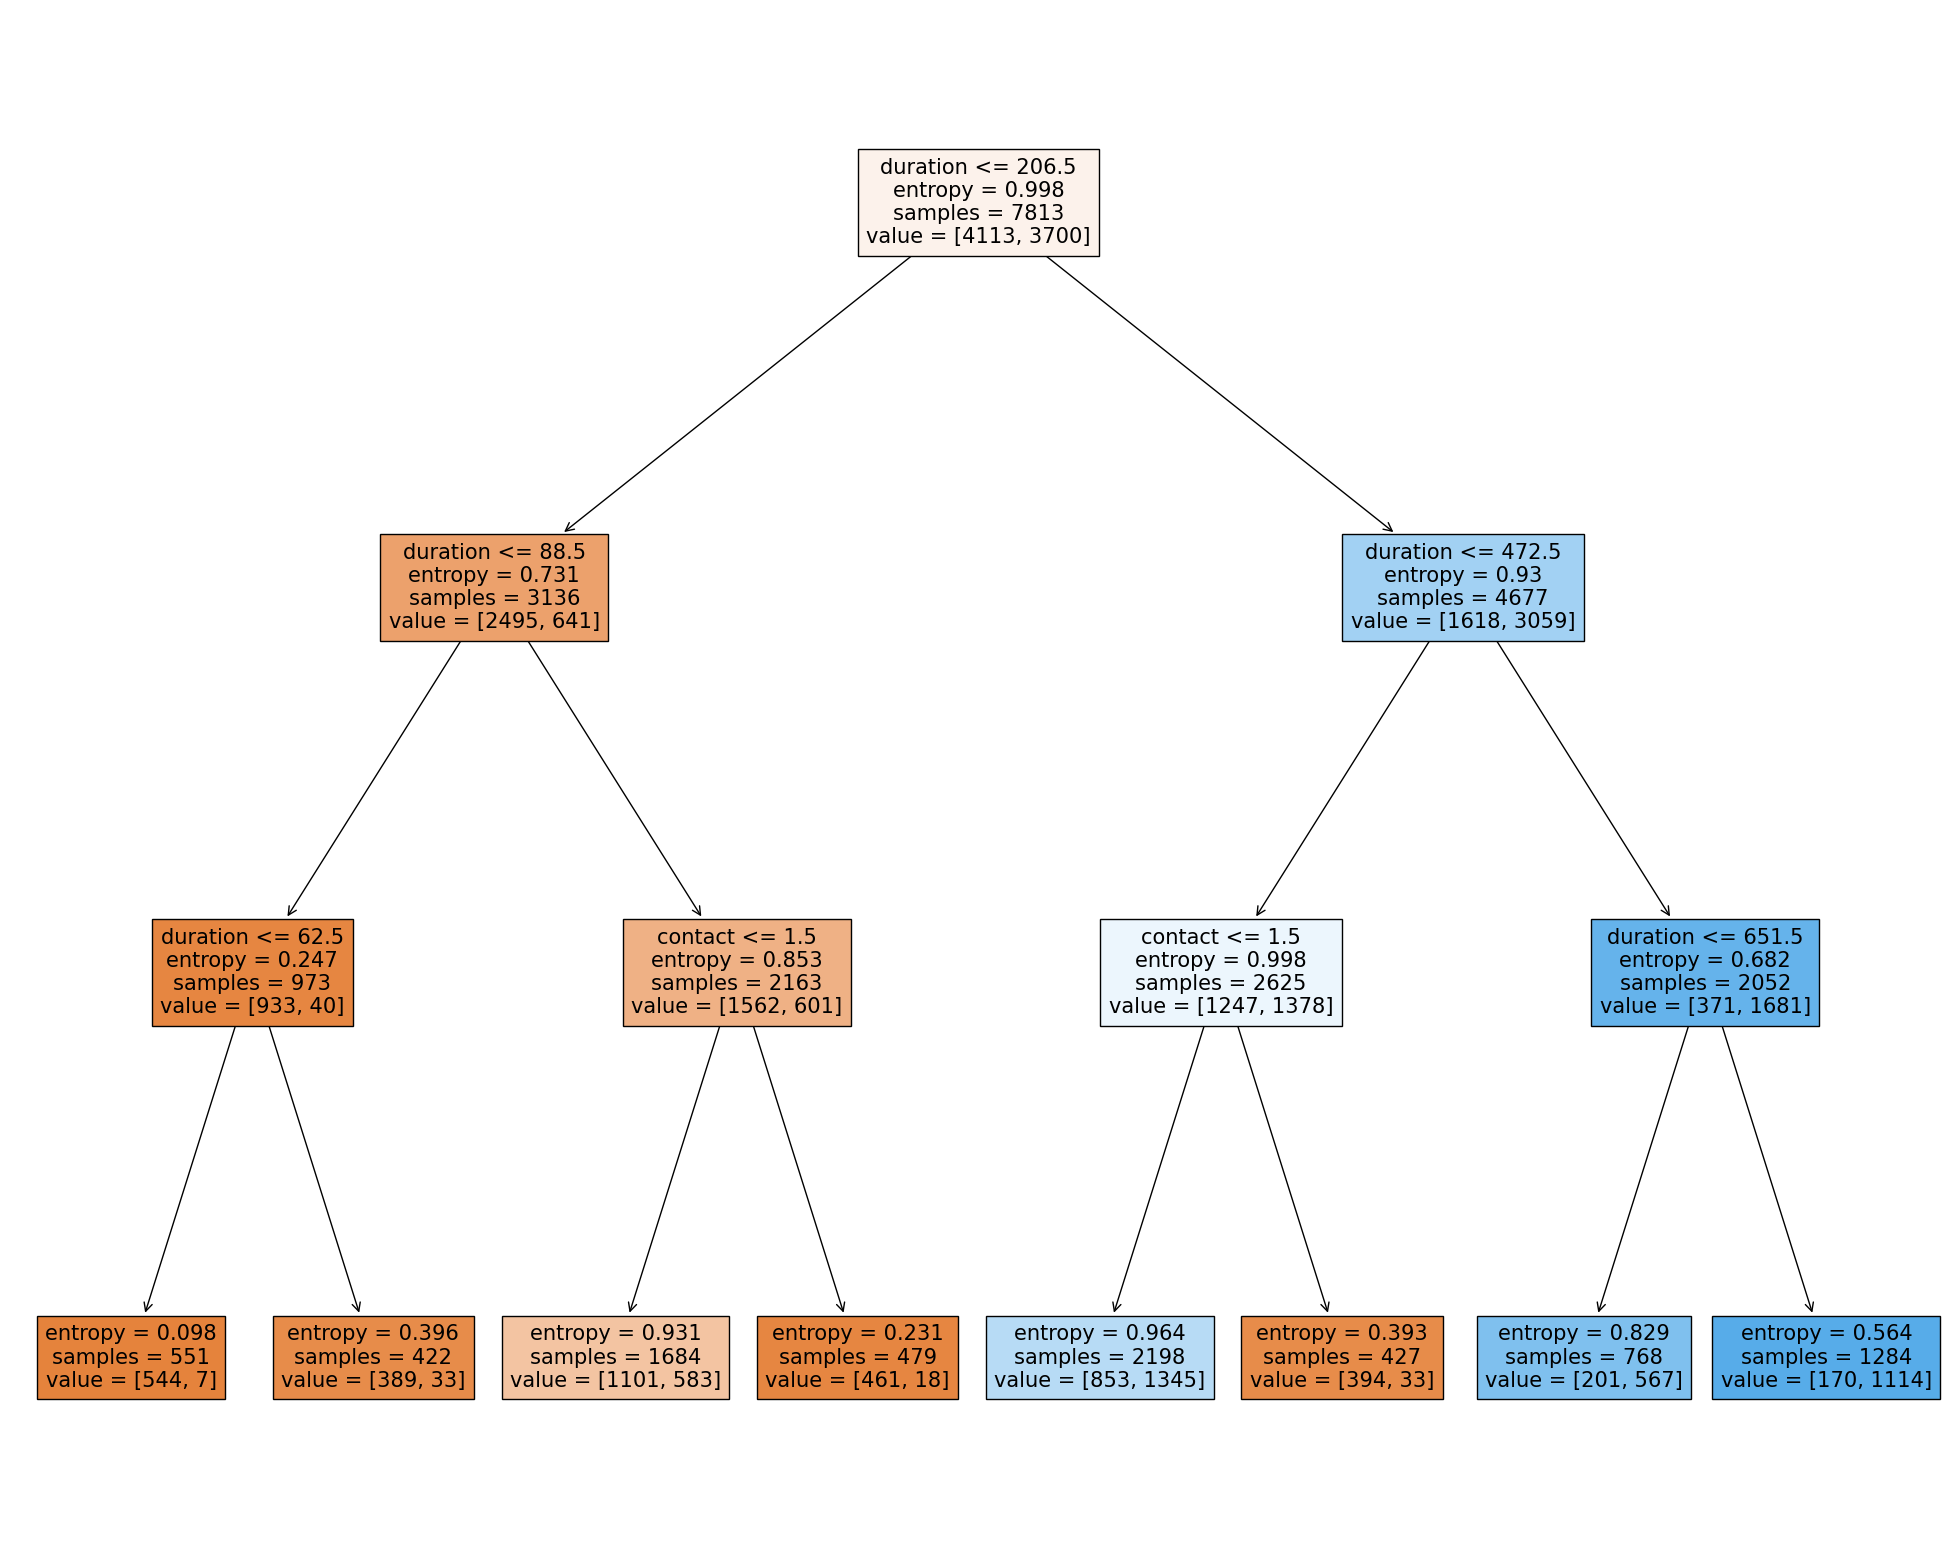

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(dt7,filled=True,feature_names=x.columns)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 3, 4, 5, 7],
          'min_samples_leaf' : [10, 20, 50,100,150],
         }

grid_search = GridSearchCV(dt, param_grid= params)

In [ ]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7],
                         'min_samples_leaf': [10, 20, 50, 100, 150]})

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 50}

In [ ]:
my_best_preds = grid_search.predict(xtest)

In [ ]:
accuracy_score(ytest, my_best_preds)

0.8097939683487608

In [ ]:
print(classification_report(ytest, my_best_preds))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1760
           1       0.81      0.78      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

